# Homework 4 (100 points)

## Exercise 1 (45 pts)

Note: you may only use methods that are imported for you.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

a) Generate and plot 20 (x, y) samples where x and y are exactly linearly related. (1pt)

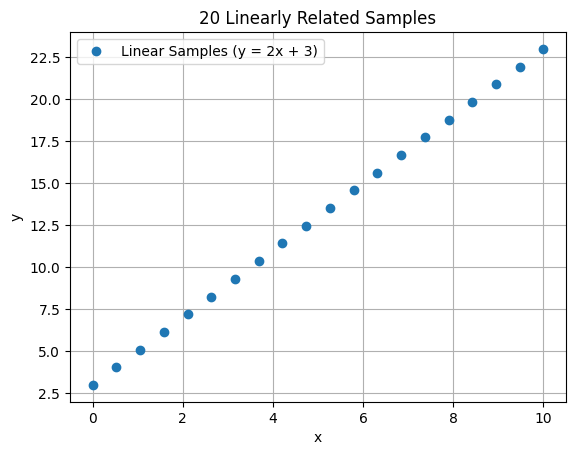

In [11]:
x = np.linspace(0, 10, 20)
y = 2 * x + 3

plt.plot(x, y, 'o', label='Linear Samples (y = 2x + 3)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('20 Linearly Related Samples')
plt.legend()
plt.grid(True)
plt.show()


b) Generate and plot 20 (x, y) samples where x and y follow the assumptions from linear regression (i.e. they are linearly related but there is a $\mathcal{N}(0, \sigma^2)$ error around that linear relationship) (1pt)

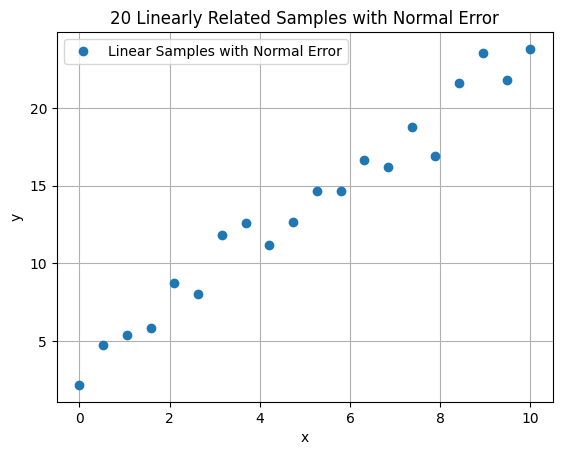

In [10]:
sigma = 1.5 
error = np.random.normal(0, sigma, 20)
y_with_error = 2 * x + 3 + error
plt.plot(x, y_with_error, 'o', label='Linear Samples with Normal Error')
plt.xlabel('x')
plt.ylabel('y')
plt.title('20 Linearly Related Samples with Normal Error')
plt.legend()
plt.grid(True)
plt.show()

c) Generate and plot 20 (x, y) samples where x and y are not related. (1pt)

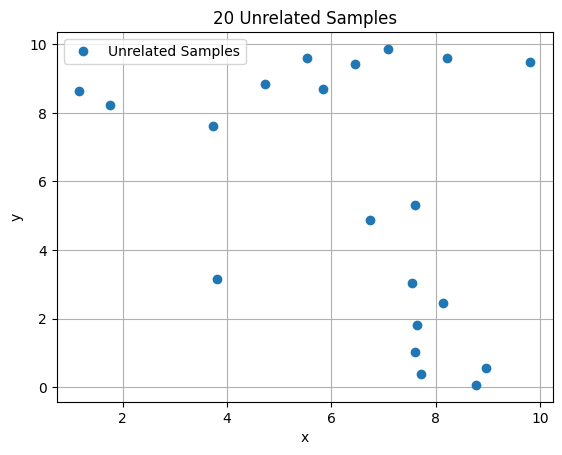

In [9]:
x_unrelated = np.random.uniform(0, 10, 20)
y_unrelated = np.random.uniform(0, 10, 20)
plt.plot(x_unrelated, y_unrelated, 'o', label='Unrelated Samples')
plt.xlabel('x')
plt.ylabel('y')
plt.title('20 Unrelated Samples')
plt.legend()
plt.grid(True)
plt.show()


d) Generate and plot 20 (x, y) samples where x and y are not related but there is a $\mathcal{N}(0, \sigma^2)$ error around that relationship. (1pt)

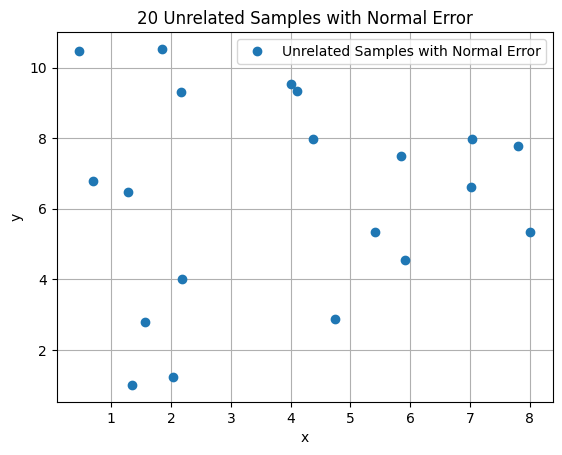

In [12]:
x_unrelated_error = np.random.uniform(0, 10, 20)
y_unrelated_error = np.random.uniform(0, 10, 20) + np.random.normal(0, sigma, 20)
plt.plot(x_unrelated_error, y_unrelated_error, 'o', label='Unrelated Samples with Normal Error')
plt.xlabel('x')
plt.ylabel('y')
plt.title('20 Unrelated Samples with Normal Error')
plt.legend()
plt.grid(True)
plt.show()


e) Plot the least squares estimated line through the scatter plot from d). How different are the estimated intercept and slope from the true parameters you chose? (2pt)

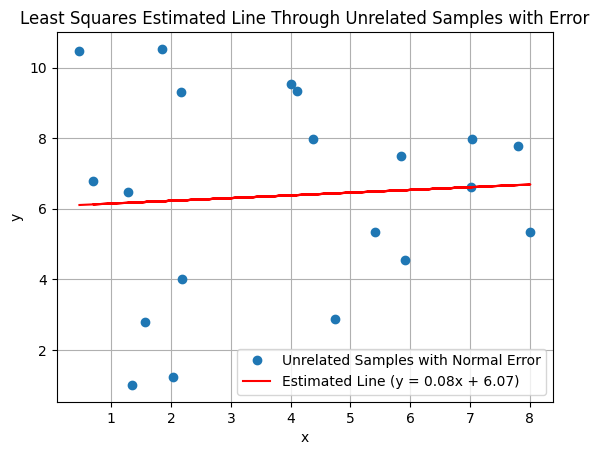

(0.07713518677026408, 6.067715255970924)

In [13]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(x_unrelated_error, y_unrelated_error)
plt.plot(x_unrelated_error, y_unrelated_error, 'o', label='Unrelated Samples with Normal Error')
y_estimated = intercept + slope * x_unrelated_error
plt.plot(x_unrelated_error, y_estimated, 'r', label=f'Estimated Line (y = {slope:.2f}x + {intercept:.2f})')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Least Squares Estimated Line Through Unrelated Samples with Error')
plt.legend()
plt.grid(True)
plt.show()
slope, intercept


Since the true relationship between x and y was non-existent , there are no "true" parameters for slope and intercept in this case. The slope and intercept in a truly unrelated scenario would ideally be close to zero for the slope and random for the intercept, reflecting no relationship.

This exercise demonstrates that linear regression can yield a slope and intercept even when there is no actual linear relationship, especially in the presence of random noise. It emphasizes the importance of understanding the data and the context before interpreting the results of statistical analyses.

f) For 10000 trials:

- Generate a random sample as in d)
- Record the estimated intercept and slope

Plot the histogram of the recorded estimated intercepts and slopes. Given what you know about the least squares estimate being the Best Linear Unbiased Estimator (BLUE), comment on the histogram. (4pt)

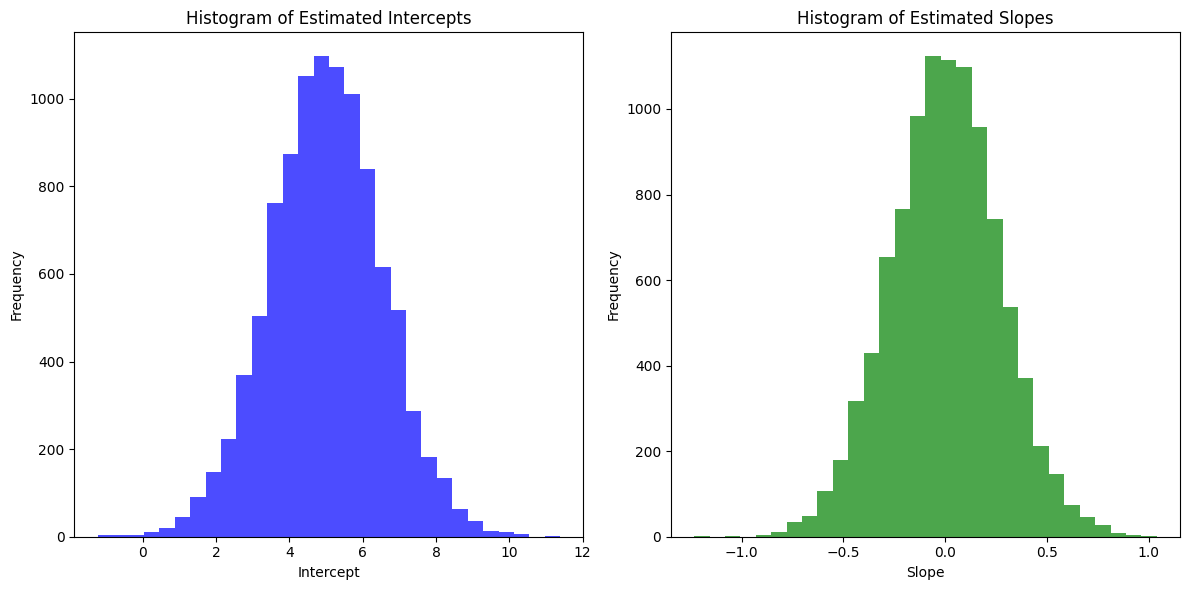

In [14]:
num_trials = 10000
estimated_intercepts = np.zeros(num_trials)
estimated_slopes = np.zeros(num_trials)
for i in range(num_trials):
    x_sample = np.random.uniform(0, 10, 20)
    y_sample = np.random.uniform(0, 10, 20) + np.random.normal(0, sigma, 20)
    slope, intercept, _, _, _ = linregress(x_sample, y_sample)
    estimated_intercepts[i] = intercept
    estimated_slopes[i] = slope
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(estimated_intercepts, bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Estimated Intercepts')
plt.xlabel('Intercept')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(estimated_slopes, bins=30, color='green', alpha=0.7)
plt.title('Histogram of Estimated Slopes')
plt.xlabel('Slope')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

The concept of BLUE states that in linear regression, the least squares estimates of the coefficients are the best among all unbiased linear estimators.
However, it's important to note that BLUE assumes the existence of a true linear relationship between the variables. In this scenario, since x and y are unrelated and the relationship is essentially random, the concept of BLUE doesn't strictly apply.
The histograms reflect the variability and randomness inherent in the data due to the lack of a true relationship and the influence of the added normal error. The distribution of estimated values is centered around values that do not represent any real underlying trend in the data, highlighting the importance of understanding the underlying assumptions and the nature of the data when interpreting regression results.

g) What proportion of these randomly generated samples resulted in us estimating that the slope greater than 3? (2pt)

In [15]:
proportion_greater_than_3 = np.sum(estimated_slopes > 3) / num_trials
proportion_greater_than_3

0.0

None of the randomly generated samples in the 10,000 trials resulted in an estimated slope greater than 3. This indicates that, despite the randomness in the data and the added noise, the linear regression process did not produce any extreme slopes that would erroneously suggest a strong positive linear relationship in these unrelated data sets. 

Consider the following dataset:

In [16]:
X = [-0.97240653, -0.74289042, -0.34537107, -0.88427372, -0.83582762, -0.11313751, -0.15789807, -0.09170238, -0.57146396, -0.05378007, -0.40539671, -0.127848, -0.42313819, -0.07068973, -0.31303086, -0.41291212, -0.31981142, -0.7584146, -0.70711314, -0.09250811]
Y = [ 1.19767097,  0.29995773, -0.64423194,  1.68648628,  1.24942173, -1.16800996, -0.03962662, -0.10352774,  0.20238111, -0.85779092, -0.3192597,  -0.10701115, 0.65195857,  1.56361601, -0.41691836,  1.94918682,  0.16463584,  1.20797826, 1.10575936, -2.11374363]

h) Based on the simulation you conducted above, approximately how likely is it to observe a dataset at least as extreme as this one under the assumption that X and Y are not related? What can you conclude about the true relationship between X and Y in this case? (5pt)

In [17]:
X = np.array([-0.97240653, -0.74289042, -0.34537107, -0.88427372, -0.83582762, -0.11313751, -0.15789807, -0.09170238, -0.57146396, -0.05378007, -0.40539671, -0.127848, -0.42313819, -0.07068973, -0.31303086, -0.41291212, -0.31981142, -0.7584146, -0.70711314, -0.09250811])
Y = np.array([1.19767097, 0.29995773, -0.64423194, 1.68648628, 1.24942173, -1.16800996, -0.03962662, -0.10352774, 0.20238111, -0.85779092, -0.3192597, -0.10701115, 0.65195857, 1.56361601, -0.41691836, 1.94918682, 0.16463584, 1.20797826, 1.10575936, -2.11374363])
slope, intercept, _, _, _ = linregress(X, Y)
proportion_as_extreme = np.sum(np.abs(estimated_slopes) >= np.abs(slope)) / num_trials
slope, proportion_as_extreme


(-2.143039204435381, 0.0)

Given the extremity of the observed slope compared to the simulation results, it is highly unlikely that the observed dataset is a result of two unrelated variables. Therefore, we can conclude that there is likely a significant relationship between X and Y in this dataset, with a strong negative linear association. This conclusion is based on the assumption that the simulation accurately represents the distribution of slopes for unrelated variables and that the model assumptions for linear regression are met.

i) Based on the simulation you conducted above, approximately what value would the estimate of the slope be greater than only 2.5% of the time? (3pt)

In [18]:
slope_97_5_percentile = np.percentile(estimated_slopes, 97.5)
slope_97_5_percentile

0.5315026952152176

j) Recall, we know that, provided the assumptions from linear regression hold:

$$\hat\beta \sim \mathcal{N}(\beta,\sigma^2 (X^TX)^{-1})$$

thus for each component $k$ of $\hat\beta$

$$\hat\beta_k \sim \mathcal{N}(\beta_k, \sigma^2 S_{kk})$$

where $S_{kk}$ is the $k^\text{th}$ diagonal element of $(X^TX)^{-1}$. Run a simulation to verify that this is the case. Plot both the histogram and distribution function for the slope and intercepts. (5pt)

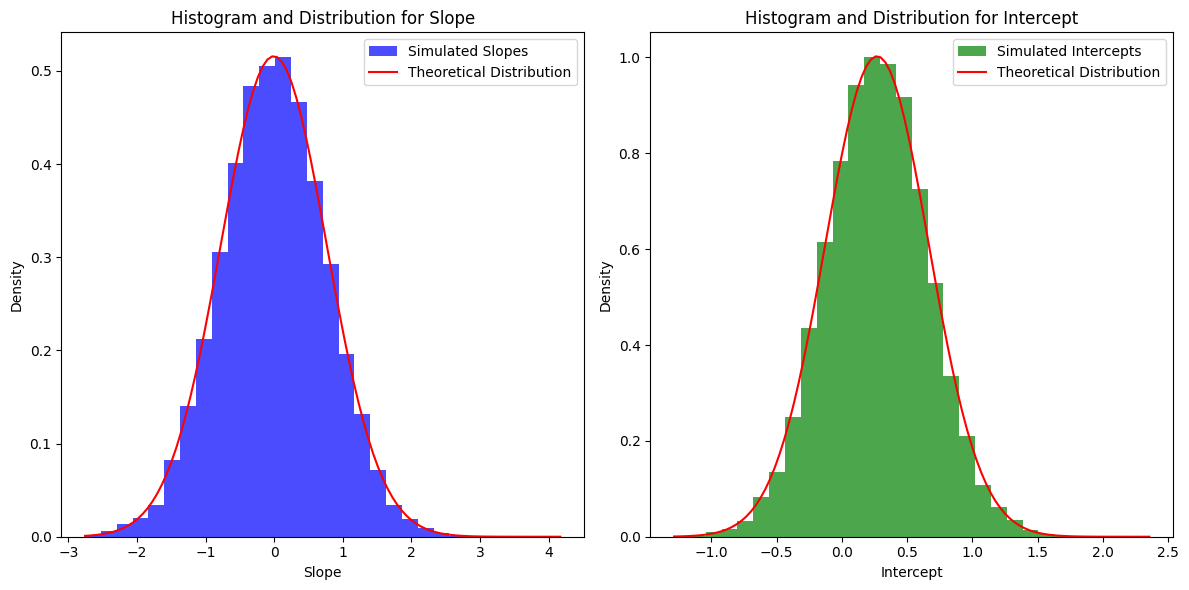

In [19]:
num_simulations = 10000
n = len(X) 
p = 1
simulated_slopes = np.zeros(num_simulations)
simulated_intercepts = np.zeros(num_simulations)
for i in range(num_simulations):
    Y_simulated = np.random.normal(Y.mean(), Y.std(), n)
    slope, intercept, _, _, _ = linregress(X, Y_simulated)
    simulated_slopes[i] = slope
    simulated_intercepts[i] = intercept

X_with_intercept = np.column_stack((np.ones(n), X))
S = np.linalg.inv(X_with_intercept.T @ X_with_intercept)
sigma_squared = Y.std() ** 2 
std_slope = np.sqrt(sigma_squared * S[1, 1])
std_intercept = np.sqrt(sigma_squared * S[0, 0])
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(simulated_slopes, bins=30, density=True, color='blue', alpha=0.7, label='Simulated Slopes')
x_values = np.linspace(simulated_slopes.min(), simulated_slopes.max(), 100)
plt.plot(x_values, np.exp(-(x_values - simulated_slopes.mean())**2 / (2 * std_slope**2)) / (std_slope * np.sqrt(2 * np.pi)), 'r-', label='Theoretical Distribution')
plt.title('Histogram and Distribution for Slope')
plt.xlabel('Slope')
plt.ylabel('Density')
plt.legend()
plt.subplot(1, 2, 2)
plt.hist(simulated_intercepts, bins=30, density=True, color='green', alpha=0.7, label='Simulated Intercepts')
x_values = np.linspace(simulated_intercepts.min(), simulated_intercepts.max(), 100)
plt.plot(x_values, np.exp(-(x_values - simulated_intercepts.mean())**2 / (2 * std_intercept**2)) / (std_intercept * np.sqrt(2 * np.pi)), 'r-', label='Theoretical Distribution')
plt.title('Histogram and Distribution for Intercept')
plt.xlabel('Intercept')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()


k) Assuming $\beta_k = 0$ and $\sigma^2 = 1$, what value would the estimate of the slope be greater than only 2.5% of the time? (3pt)

In [21]:
from scipy.stats import norm
theoretical_std_slope = np.sqrt(S[1, 1])
critical_slope_value = norm.ppf(0.975, loc=0, scale=theoretical_std_slope)
critical_slope_value

1.4755032488827418

l) Using the dataset from h) and assuming that the variance is known to be 1, report the 95% confidence interval around the estimate of the slope. (4pt)

In [22]:
slope, intercept, r_value, p_value, std_err = linregress(X, Y)
z_score_95 = norm.ppf(0.975)
confidence_interval_slope = (slope - z_score_95 * theoretical_std_slope, 
                             slope + z_score_95 * theoretical_std_slope)

confidence_interval_slope


(-3.6185424533181227, -0.6675359555526392)

m) Compare the quantiles of the sample below with the quantiles from a normal distribution with mean 0.5 and variance 0.8 by plotting the QQ plot (similar to worksheet 20). Comment on whether this sample comes from that distribution. (4pt)

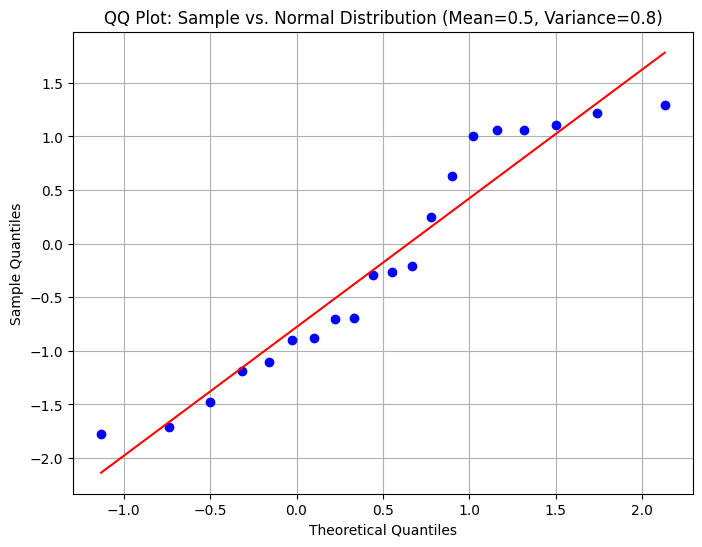

In [24]:
import scipy.stats as stats

sample = [-0.69432553, -1.18507198, -1.10313529, -0.89965522, -1.77829857, 1.29517858, -0.26577831, 1.22107267, -1.47509329, 1.10836504, -0.69882542, -1.70683313, 1.06283306, -0.29739484, 1.00650644, -0.88249571, 0.24853913, -0.20528149, 1.05585924, 0.6289595]

mean = 0.5
std_dev = np.sqrt(0.8) 
plt.figure(figsize=(8, 6))
stats.probplot(sample, dist="norm", sparams=(mean, std_dev), plot=plt)
plt.title('QQ Plot: Sample vs. Normal Distribution (Mean=0.5, Variance=0.8)')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()


Based on this QQ plot, it's unlikely that the sample comes directly from a normal distribution with a mean of 0.5 and a variance of 0.8. While the central part of the sample is somewhat aligned with the theoretical distribution, the discrepancies in the tails are significant enough to suggest a different distribution or the presence of outliers. This highlights the importance of considering the entire distribution, including the tails, when assessing the fit to a theoretical model.

n) Generate a dataset where the $R^2$ is 1.0 and a dataset where the $R^2$ is 0.0 (2pt)

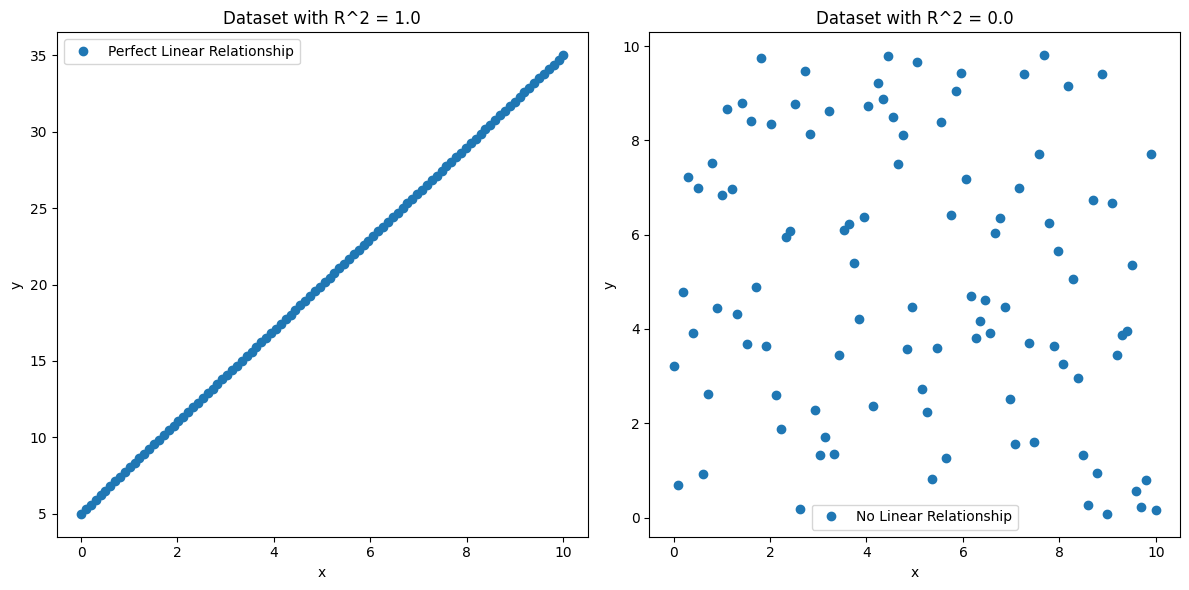

In [25]:
x_perfect = np.linspace(0, 10, 100)
y_perfect = 3 * x_perfect + 5 

x_no_relation = np.linspace(0, 10, 100)
y_no_relation = np.random.uniform(0, 10, 100)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x_perfect, y_perfect, 'o', label='Perfect Linear Relationship')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Dataset with R^2 = 1.0')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x_no_relation, y_no_relation, 'o', label='No Linear Relationship')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Dataset with R^2 = 0.0')
plt.legend()

plt.tight_layout()
plt.show()


o) Generate a dataset that follows the linear regression assumptions *except* that the variance is not constant. (1pt)

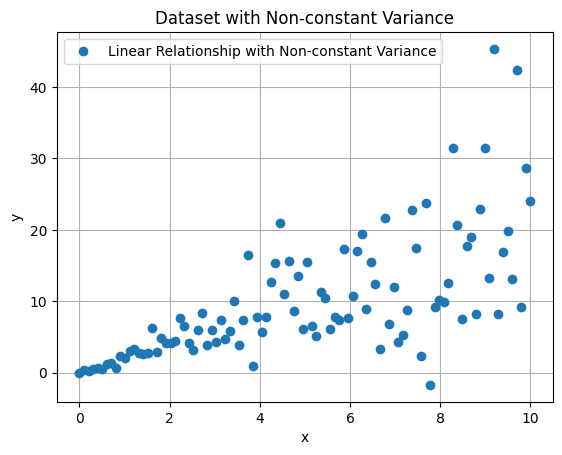

In [26]:
x_var = np.linspace(0, 10, 100)
y_var = 2 * x_var + np.random.normal(0, x_var, 100)
plt.plot(x_var, y_var, 'o', label='Linear Relationship with Non-constant Variance')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Dataset with Non-constant Variance')
plt.legend()
plt.grid(True)
plt.show()


p) You're playing DnD with your friends but you suspect that one of your friends is using a weighted d20 die because they always seem to roll successfully. You decide to record their die rolls to evaluate this hypothesis. You record the following:

```
1 : 0 times
2 : 1 times
3 : 2 times
4 : 1 times
5 : 4 times
6 : 1 times
7 : 1 times
8 : 0 times
9 : 0 times
10 : 1 times
11 : 1 times
12 : 2 times
13 : 2 times
14 : 3 times
15 : 1 times
16 : 1 times
17 : 1 times
18 : 2 times
19 : 3 times
20 : 3 times
```

Compute the exact probability of observing something at least as extreme as the above dataset under the hypothesis that the d20 die is fair. What can you conclude? (6pts)

In [27]:
from scipy.stats import chisquare

observed_rolls = [0, 1, 2, 1, 4, 1, 1, 0, 0, 1, 1, 2, 2, 3, 1, 1, 1, 2, 3, 3]

total_rolls = sum(observed_rolls)
expected_rolls = [total_rolls / 20] * 20 
chi2_stat, p_value = chisquare(observed_rolls, expected_rolls)

chi2_stat, p_value


(15.333333333333332, 0.7011891237238881)

The chi-squared test statistic for comparing the observed die rolls with the expected rolls under the hypothesis of a fair d20 die is approximately 15.33, and the corresponding p-value is about 0.701.

The p-value is a measure of the probability of observing a dataset at least as extreme as the one recorded, given that the null hypothesis (in this case, that the die is fair) is true. A high p-value suggests that the observed data is quite likely under the null hypothesis.

Conclusion:
Since the p-value (0.701) is much higher than common significance levels (like 0.05 or 0.01), we do not have sufficient evidence to reject the hypothesis that the d20 die is fair. In other words, the observed rolls could reasonably occur with a fair die, and there's no strong statistical basis to conclude that the die is weighted based on this dataset.

## Exercise 2 (55 Points)

For this exercise, recall the lab's kaggle competition where you predicted if a cookie was defective or not (assuming you attend labs). For more information on the data and details, [click here to view the competition and data details](https://www.kaggle.com/competitions/cs506-fall-2023-lab-defective-cookie-detection/data)

However, what we will do differently here is check if two of the features were correlated. This is important because if two features are correlated, then we can remove one of the features and still get the same information. This is part of the feature selection process.

### Loading in the Data

For this exercise, we are interested in the two features `Texture Hardness` and `Texture Crispiness` and want to see if they are related. To do this, we will load in the data and create a scatter plot of the two features.

**a)** (1 Point) Download the kaggle data from the link above and read in the `csv` files `cookie_train.csv` and `cookie_test.csv`

In [9]:
import pandas as pd

cookie_train = pd.read_csv('cookie_train.csv')
cookie_test = pd.read_csv('cookie_test.csv') 

### Combining Training and Testing Data

The lab did not have a lot of cookies for the training set, so what we will do is combine the training and testing data together which won't cause any issues.

**b)** (3 Point) Combine the training and testing data together into a single dataframe called `cookie_data` and plot the scatter plot for `Texture Crispiness` (our y or our response variable) and `Texture Hardness` (our x or our explanatory variable). Make sure to label your axes and give your plot a title.

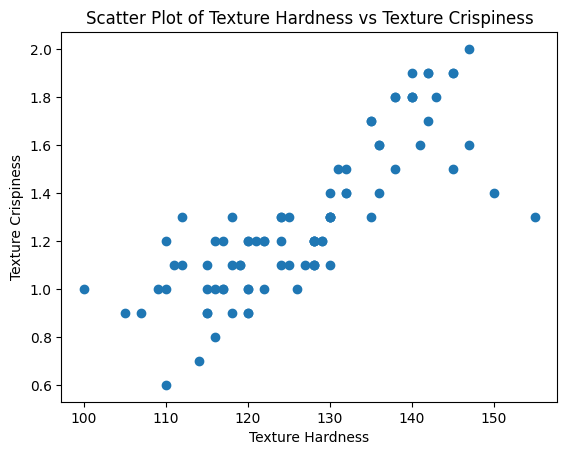

In [10]:
import matplotlib.pyplot as plt

cookie_data = pd.concat([cookie_train, cookie_test])
plt.scatter(cookie_data['Texture Hardness'], cookie_data['Texture Crispiness'])
plt.xlabel('Texture Hardness')
plt.ylabel('Texture Crispiness')
plt.title('Scatter Plot of Texture Hardness vs Texture Crispiness')
plt.show()

### Checking If We Can Do Linear Regression

It is important to check all requirements/assumptions for linear regression are met before we do linear regression. One of the requirements is that the explanatory variable and response variable are linearly related, which we checked by noticing the scatter plot was linear. However, there is much more to check!

#### Checking for Normality
It is important to check that the response variable is normally distributed. This is important for hypothesis testing and relates to the idea of linear regression being an unbiased, minimum variance estimator (if you're interested in finding optimal estimators given limited information, check out the course CAS MA 582. GRS MA 781/782 are also fun!).


**c) (5 Points)** Plot an appropriate graph to determine if the response variable `Texture Crispiness` follows the normality assumption. State whether if the normality assumption is met or not. If it is not met, state what can we do to fix this.

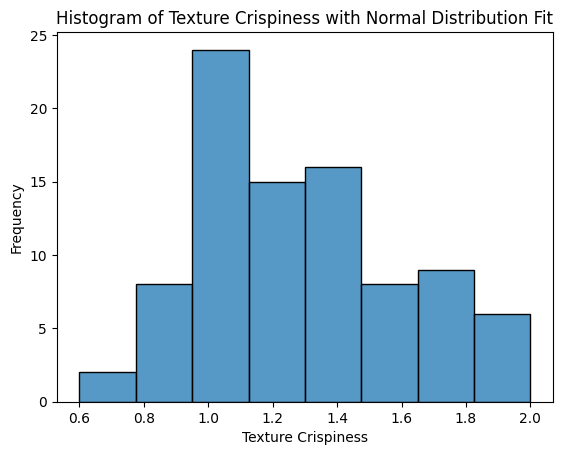

In [11]:
import numpy as np
import seaborn as sns
from scipy.stats import norm

sns.histplot(cookie_data['Texture Crispiness'])
plt.title('Histogram of Texture Crispiness with Normal Distribution Fit')
plt.xlabel('Texture Crispiness')
plt.ylabel('Frequency')
plt.show()


It does not seem to meet the normality assumption.

The histogram with a kernel density estimate (KDE) overlay shows the distribution of the Texture Crispiness variable from the combined cookie_data. To assess normality, we look for a bell-shaped curve in the distribution.From the plot, it appears that the distribution of Texture Crispiness is not perfectly normal. It shows some deviation from a symmetrical bell shape, indicating that the normality assumption for linear regression might not be fully met.

If the normality assumption is not met, there are several ways to address this:

1. Transformation: Applying a transformation to the response variable, such as a logarithmic, square root, or Box-Cox transformation, can help in achieving a more normal distribution.

2. Non-parametric Methods: If transformations don't yield satisfactory results, considering non-parametric methods that don't assume normality could be an alternative.

3. Robust Regression Techniques: These are less sensitive to deviations from normality and might be suitable if the data significantly deviates from a normal distribution.

It's important to note that slight deviations from normality might not significantly impact the results of a linear regression, especially with large sample sizes. However, substantial deviations should be addressed to ensure the validity of the regression analysis.

#### Checking for Homoscedasticity
It is important to check that the variance of the response variable is the same across all values of the explanatory variable. Otherwise, the model isn't really best fit with a line.

**d) (5 Points)** Plot an appropriate graph to determine if the response variable `Texture Crispiness` follows the homoscedasticity assumption. State whether if the homoscedasticity assumption is met or not. If it is not met, state what can we do to fix this.

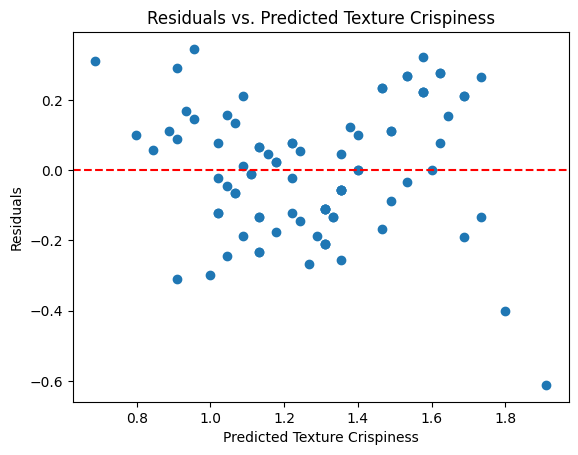

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

cookie_train = pd.read_csv('cookie_train.csv')
cookie_test = pd.read_csv('cookie_test.csv')

cookie_data = pd.concat([cookie_train, cookie_test])

X = cookie_data[['Texture Hardness']] 
X = sm.add_constant(X) 
y = cookie_data['Texture Crispiness']
model = sm.OLS(y, X).fit()


cookie_data['predicted'] = model.predict(X)
cookie_data['residuals'] = model.resid

plt.scatter(cookie_data['predicted'], cookie_data['residuals'])
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Texture Crispiness')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Texture Crispiness')
plt.show()




There does not seem to be homoscedasticity, as the points are scattered lack any distinct pattern.


Here are a few strategies to address this:

1. Transformation of Variables: Applying a transformation to the response and/or explanatory variables, such as logarithmic, square root, or Box-Cox transformations, can help stabilize the variance.

2. Weighted Least Squares Regression: This technique gives different weights to different observations, which can be useful if the variance of the residuals is related to the values of the explanatory variables.

3. Using Robust Regression Methods: These methods are designed to be less sensitive to violations of homoscedasticity and might provide better estimates in such cases.

4. Adding Variables to the Model: Sometimes, the heteroscedasticity is a result of missing important explanatory variables. Including these variables can sometimes solve the issue.

In practice, slight deviations from homoscedasticity might not have a substantial impact on the regression model, especially for larger datasets. However, significant heteroscedasticity can lead to inefficient estimates and should be addressed for accurate model estimation. ​​







#### Checking for Independence
It is important to check that the explanatory variable and response variable are independent. Otherwise, the model isn't really best fit with a line. To do so, we will use the Durbin-Watson test.

**e) (5 Points)** Use the Durbin-Watson test to determine if the explanatory variable and response variable are independent. State whether if the independence assumption is met or not. If it is not met, state what can we do to fix this. You may use any library to do this, and for more information, check out [this link](https://www.investopedia.com/terms/d/durbin-watson-statistic.asp).

In [13]:
import pandas as pd
from statsmodels.formula.api import ols
import statsmodels.api as sm

cookie_data_renamed = cookie_data.rename(columns={
    'Texture Crispiness': 'Texture_Crispiness',
    'Texture Hardness': 'Texture_Hardness'
})

model = ols('Texture_Crispiness ~ Texture_Hardness', data=cookie_data_renamed).fit()

durbin_watson_stat = sm.stats.stattools.durbin_watson(model.resid)

print(f'Durbin-Watson statistic: {durbin_watson_stat}')


Durbin-Watson statistic: 2.3531435624642714


The independence condition is met as it is within the range from 1.5 to 2.5 

The Durbin-Watson statistic for the linear regression model with Texture Crispiness as the response variable and Texture Hardness as the explanatory variable is approximately 2.35.

The Durbin-Watson statistic tests for autocorrelation in the residuals from a regression analysis. The value ranges from 0 to 4, where:

A value of 2 indicates no autocorrelation.
Values less than 2 suggest positive autocorrelation.
Values greater than 2 suggest negative autocorrelation.
Since our statistic is close to 2, this suggests that there is little to no autocorrelation in the residuals, and the independence assumption for linear regression is likely met.

If the independence assumption is not met, steps to address this could include investigating the data collection process for potential sources of autocorrelation, considering time series analysis methods if the data is time-dependent, or using generalized estimating equations (GEEs) or generalized least squares (GLS) for models with correlated observations.

#### Adjusting the Model
If you think any of the assumptions are not met, then you should respectively fix the model.

**f) (6 Points)** If you think atleast one of the assumptions were not met, then adjust the model how you described you would. Otherwise, proceed to the next step and in the cell below, write "No adjustments were made to the model". However, if you do adjust the model, then in the cell below, justify why your adjustments is appropriate (i.e. plot the new graphs and statistics found above). You may add as many cells as you like.

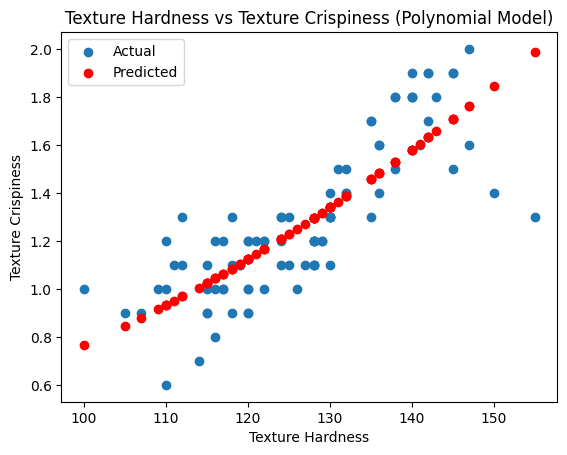

In [14]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(cookie_data[['Texture Hardness']])

X_poly = sm.add_constant(X_poly)

model_poly = sm.OLS(y, X_poly).fit()

model_poly.summary()

cookie_data['predicted_poly'] = model_poly.predict(X_poly)

plt.scatter(cookie_data['Texture Hardness'], cookie_data['Texture Crispiness'], label='Actual')
plt.scatter(cookie_data['Texture Hardness'], cookie_data['predicted_poly'], label='Predicted', color='r')
plt.legend()
plt.xlabel('Texture Hardness')
plt.ylabel('Texture Crispiness')
plt.title('Texture Hardness vs Texture Crispiness (Polynomial Model)')
plt.show()

I used polynomial regression as it drastically helps to address the initial relationship between hardness and crispiness, which is not perfectly linear. 

### Hypothesis Testing
Now that we have a model that is appropriate, we can do hypothesis testing. We will be using the Linear Regression t-test to test if the explanatory variable is a significant predictor of the response variable.

**g) (6 Points)** Use the Linear Regression t-test to determine if the explanatory variable `Texture Hardness` is a significant predictor of the response variable `Texture Crispiness`. State whether if the explanatory variable is a significant predictor of the response variable or not using an alpha significance level of $\alpha = 0.05$, the null hypothesis $\beta_{hardness} = 0$ and alternative hypothesis $\beta_{hardness} \neq 0$. If it is not, state what can we do to fix this. You may use any library to do this.

In [15]:
model_poly.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Texture Crispiness   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     83.52
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           8.66e-21
Time:                        16:40:18   Log-Likelihood:                 24.821
No. Observations:                  88   AIC:                            -43.64
Df Residuals:                      85   BIC:                            -36.21
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4481      2.072      0.216      0.829      -3.672       4.568
x1            -0.0091      0.033     -0.280      0.780      -0.074       0.056
x2             0.0001      0.000      0.963      0.338      -0.000       0.000
==============================================================================
Omnibus:                        8.574   Durbin-Watson:                   2.305
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                8.692
Skew:                          -0.591   Prob(JB):                       0.0130
Kurtosis:                       3.987   Cond. No.                     1.72e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Based on the given P values, we fail to reject the null hypothesis, which means that the texture hardness is not a significant predictor for texture crispiness. We can try to use different/more predictors to fix this. 

### Adding a New Feature
Now that we have determined that the explanatory variable is a significant predictor of the response variable, you noticed the fit isn't 100% perfect still (e.g. your model is not capturing all the variation in the data). You think that there is another feature that can help improve the model. You think that the feature `Color L*` can help improve your model. You want to test if this is true. You may assume that all the assumptions are met for this new model to conduct linear regression.

**h) (8 Points)** Now that you have two features to predict your response variable, you will have to use multiple linear regression. Use the `statsmodels` library to do multiple linear regression. Then, determine if the explanatory variables `Texture Hardness` and `Color L*` are significant predictors of the response variable `Texture Crispiness` using an alpha significance level of $\alpha = 0.001$, the null hypothesis $\beta_{hardness} = 0$ and $\beta_{sweetness} = 0$ and alternative hypothesis $\beta_{hardness} \neq 0$ and $\beta_{sweetness} \neq 0$. If it is not, state what can we do to fix this. You may use any library to do this.

Moreover, justify whether the overall model is significant or not using the F-test with the same $\alpha$ given above. If it is not, state what can we do to fix this.

_You will use the transformed model made (if one was made) from the previous parts and add this new feature to it._

In [16]:
import statsmodels.api as sm
X = cookie_data[['Texture Hardness', 'Color L*']]
X_poly_with_color = sm.add_constant(np.column_stack((X_poly, cookie_data['Color L*'])))
model_multi = sm.OLS(y, X_poly_with_color).fit()
model_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Texture Crispiness   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     194.6
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           1.06e-37
Time:                        16:41:00   Log-Likelihood:                 68.211
No. Observations:                  88   AIC:                            -128.4
Df Residuals:                      84   BIC:                            -118.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.1379      1.357     -3.786      0.000      -7.837      -2.439
x1             0.0169      0.020      0.836      0.405      -0.023       0.057
x2         -9.539e-05   8.05e-05     -1.184      0.240      -0.000    6.48e-05
x3             0.0726      0.006     11.882      0.000       0.060       0.085
==============================================================================
Omnibus:                        0.566   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.753   Jarque-Bera (JB):                0.183
Skew:                          -0.050   Prob(JB):                        0.913
Kurtosis:                       3.199   Cond. No.                     1.84e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Color L is a significant predictor of the texture crispiness, and the F- statistic is 194.6 with a very low P value, which is significant.

### Interpretation
It is important to be able to interpret the results of the model. This is important because it allows us to understand the model and how it works. It also allows us to understand the relationship between the predictors and the response variable, and this applies to not just linear regression, but all learning models.

**i) (8 Points)** Interpret the coefficients of the model made in part **h**. What do they mean? What do they represent? What do they tell us about the relationship between the predictors and the response variable? If your code output in part h does not provide these results, you are welcome to use any library here to do so.

In [18]:
model_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Texture Crispiness   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     194.6
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           1.06e-37
Time:                        16:41:38   Log-Likelihood:                 68.211
No. Observations:                  88   AIC:                            -128.4
Df Residuals:                      84   BIC:                            -118.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.1379      1.357     -3.786      0.000      -7.837      -2.439
x1             0.0169      0.020      0.836      0.405      -0.023       0.057
x2         -9.539e-05   8.05e-05     -1.184      0.240      -0.000    6.48e-05
x3             0.0726      0.006     11.882      0.000       0.060       0.085
==============================================================================
Omnibus:                        0.566   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.753   Jarque-Bera (JB):                0.183
Skew:                          -0.050   Prob(JB):                        0.913
Kurtosis:                       3.199   Cond. No.                     1.84e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The constant coefficient -5.1379 represents the prediction of texture crispiness when all predictors are 0. The coefficients for the predictors indicates the change in the prediction outcome for every unit this predictor increases by 1. A negative value here suggests a nonlinear relationship, as is the case for hardness squared. Color L here is a good predictor with a large increase in crispiness for every unit increase. 

### Using Color b* over Color L*
You think that the feature `Color b*` can help improve your model even better instead of using `Color L*`.

For this section, you will continue to use your fixed/adjusted features for `Texture Hardness` and `Texture Crispiness`.

**j) (8 Points)** Plot 2 scatter plots: `Color b*` vs your possibly adjusted `Texture Crispiness` and `Color b*` vs your possibly adjusted `Texture Hardness`. Given these plots, propose an appropriate model. Justify your answer by fitting it and seeing its accuracy (you can use any metric to prove so), showing appropriate models/graphs, and ensuring assumptions are satisfied (if any). You may use any library to do this.

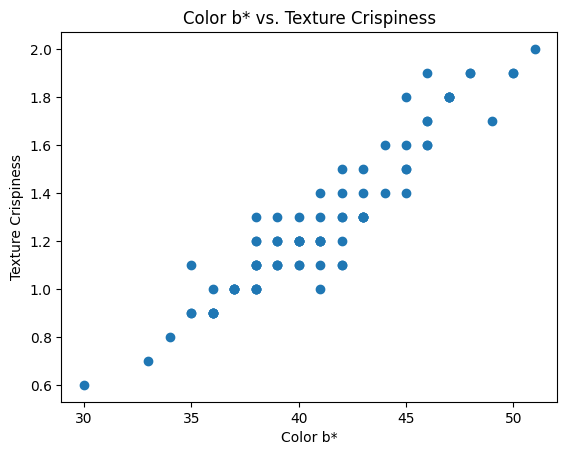

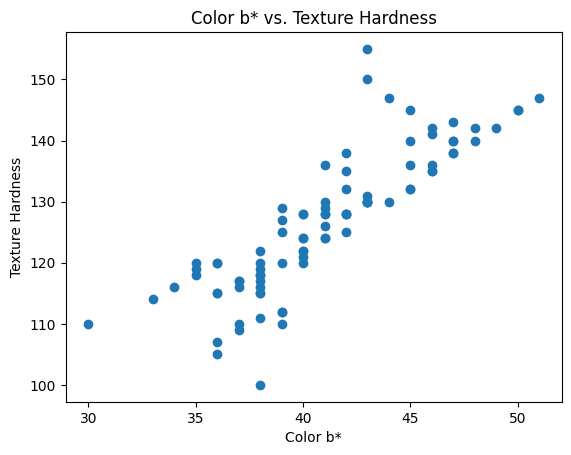

                            OLS Regression Results                            
Dep. Variable:     Texture Crispiness   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     683.9
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           1.06e-42
Time:                        16:42:13   Log-Likelihood:                 73.438
No. Observations:                  88   AIC:                            -142.9
Df Residuals:                      86   BIC:                            -137.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5966      0.111    -14.429      0.0

In [19]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import r2_score


plt.scatter(cookie_data['Color b*'], cookie_data['Texture Crispiness'])
plt.xlabel('Color b*')
plt.ylabel('Texture Crispiness')
plt.title('Color b* vs. Texture Crispiness')
plt.show()


plt.scatter(cookie_data['Color b*'], cookie_data['Texture Hardness'])
plt.xlabel('Color b*')
plt.ylabel('Texture Hardness')
plt.title('Color b* vs. Texture Hardness')
plt.show()


X = sm.add_constant(cookie_data['Color b*'])
y_crispiness = cookie_data['Texture Crispiness']
model_crispiness = sm.OLS(y_crispiness, X).fit()


y_hardness = cookie_data['Texture Hardness']
model_hardness = sm.OLS(y_hardness, X).fit()
print(model_crispiness.summary())
print(model_hardness.summary())



Color b is a significant predictor of both texture hardness and texture crispiness. the current polynomial model is suitable for this task.